# 04 Pandas

작성 : 김정훈

수정 : 한기영


#### 주의 : 판다스의 모든 것을 다루지 않습니다. Machine Learning 또는 Deep Learning을 공부하기 위해 최소한 알아야 하는 범위만을 다룹니다.



#### 선행지식
1. Python 언어 기초.
2. Numpy 라이브러리 기초.
3. table 구조의 데이터에 대한 이해. (엑셀 형태의 데이터)

#### 실습목표
1. csv 파일 읽는법. 
2. dataframe을 만드는 법.
2. dataframe을 다루기.
3. head, tail
4. 정렬
5. numpy array와 변환, 
6. 다양한 dataframe 연산.


## 0.라이브러리 불러오기 & 데이터 업로드

* csv 파일을 불러들이는 작업은 보통 pandas에서 합니다!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ls

## 1. Pandas Series

* 판다스 시리즈, 넘파이 1차원어레이, 리스트를 비교해봅시다.

In [2]:
# Pandas Series
stock = pd.Series([92600, 92400, 92100, 94300, 92300])
print(stock[1:])

# Numpy rank 1 array
np_stock = np.array([92600, 92400, 92100, 94300, 92300])
print(np_stock[:])

# python List
list_stock = [92600, 92400, 92100, 94300, 92300]
print(list_stock[1:] )


1    92400
2    92100
3    94300
4    92300
dtype: int64
[92600 92400 92100 94300 92300]
[92400, 92100, 94300, 92300]


판다스 시리즈는 지정가능한 인덱스와 값으로 저장할수 있다.

In [3]:
# 인덱스 이름을 변경할 수도 있음.
stock = pd.Series([92600, 92400, 92100, 94300, 92300]
         , index=['2018-02-19', '2018-02-18','2018-02-17','2018-02-16','2018-02-15'])
print(stock)
print('---------------------------')
print(stock.index)
print('---------------------------')
print(stock.values)

2018-02-19    92600
2018-02-18    92400
2018-02-17    92100
2018-02-16    94300
2018-02-15    92300
dtype: int64
---------------------------
Index(['2018-02-19', '2018-02-18', '2018-02-17', '2018-02-16', '2018-02-15'], dtype='object')
---------------------------
[92600 92400 92100 94300 92300]


* 인덱스 기준으로 연산 가능

In [4]:
# 인덱스 위치가 달라도, 인덱스 값을 기준으로 연산 수행.
score_math1 = pd.Series([90,80,85], index = ['james', 'daniel','bill'])
score_math2 = pd.Series([80,89,95], index = [ 'james','bill', 'daniel'])
print(score_math1)
print('---------------------------')
print(score_math2)
print('---------------------------')
print(score_math1 + score_math2)

james     90
daniel    80
bill      85
dtype: int64
---------------------------
james     80
bill      89
daniel    95
dtype: int64
---------------------------
bill      174
daniel    175
james     170
dtype: int64


* Series의 Index 이름을 변경할 수 있다

In [5]:
stock = pd.Series([92600, 92400, 92100, 94300, 92300]
         , index=['2018-02-19', '2018-02-18','2018-02-17','2018-02-16','2018-02-15'])
print(stock)


2018-02-19    92600
2018-02-18    92400
2018-02-17    92100
2018-02-16    94300
2018-02-15    92300
dtype: int64


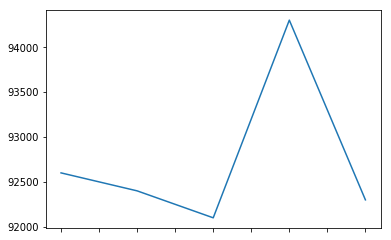

In [6]:
stock.plot()

## 2. Pandas Dataframe

### 2.1 Dataframe 생성

In [7]:
# Dataframes 생성
# Dictionary로 구조를 잡고
d = {
   'col1': ['Item0', 'Item0', 'Item1', 'Item1'],
   'col2': ['Gold', 'Bronze', 'Gold', 'Silver'],
   'col3': [1, 2, 3, 4]
}

# dataframe으로 변경
df = pd.DataFrame(d)
print(df)

    col1    col2  col3
0  Item0    Gold     1
1  Item0  Bronze     2
2  Item1    Gold     3
3  Item1  Silver     4


In [8]:
df

,col1,col2,col3
0,Item0,Gold,1
1,Item0,Bronze,2
2,Item1,Gold,3
3,Item1,Silver,4


In [9]:
df1 = df['col1']
print(type(df1))
print(df1)

<class 'pandas.core.series.Series'>
0    Item0
1    Item0
2    Item1
3    Item1
Name: col1, dtype: object


하나의 열을 조회해 올때에는  
'['의 개수에 따라 Series가 되기도, DataFrame이 되기도 한다.

In [10]:
df2 = df[['col1']]
print(type(df2))
print(df2)

<class 'pandas.core.frame.DataFrame'>
    col1
0  Item0
1  Item0
2  Item1
3  Item1


<br>

###  Pandas DataFrame <=> Numpy Array 로 바꾸기  
단, DataFrame을 Numpy Array로 바꾸면 칼럼명을 유지할 수 없다.

In [11]:
df

,col1,col2,col3
0,Item0,Gold,1
1,Item0,Bronze,2
2,Item1,Gold,3
3,Item1,Silver,4


In [12]:
# np.array()로 변환
np_array1 = np.array(df)
print(type(np_array1))
print(np_array1)
print(np_array1.shape)

<class 'numpy.ndarray'>
[['Item0' 'Gold' 1]
 ['Item0' 'Bronze' 2]
 ['Item1' 'Gold' 3]
 ['Item1' 'Silver' 4]]
(4, 3)


In [13]:
# numpy array를 다시 dataframe으로 바꾸면 칼럼명이 사라진다.
pd.DataFrame( np_array1).head()

,0,1,2
0,Item0,Gold,1
1,Item0,Bronze,2
2,Item1,Gold,3
3,Item1,Silver,4


In [14]:
# .values 로 변환
np_array2 = df.values
print(type(np_array2))
print(np_array2)
print(np_array2.shape)

<class 'numpy.ndarray'>
[['Item0' 'Gold' 1]
 ['Item0' 'Bronze' 2]
 ['Item1' 'Gold' 3]
 ['Item1' 'Silver' 4]]
(4, 3)


데이터프레임을 넘파이 어레이로 변환하면 2차원 으로 변환됨.

#### 이렇게 생성할 수 있으나 보통은 데이터 파일 / DB에서 가져옵니다.

<br>

### 2.2 CSV파일에서 데이터 불러오기

In [16]:
# Loading CSV files
# skipinitialspace 구분자 양쪽 공백은 제거.
df = pd.read_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\3_Python기초\샘플데이터\Graduate_apply.csv', sep=',', skipinitialspace=True, engine='python')  
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [17]:
df

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [19]:
# 파일로 저장하기 : to_csv
df.to_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\3_Python기초\샘플데이터\grad1.csv', header=True, index=False, encoding='utf-8')

In [20]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 1EEA-F5AB

 C:\Users\50008313\Python_Jupyter_Study\2기교육\3_Python기초\소스코드 디렉터리

2019-02-25  오전 09:46    <DIR>          .
2019-02-25  오전 09:46    <DIR>          ..
2019-02-25  오전 09:28    <DIR>          .ipynb_checkpoints
2019-02-21  오전 10:50            33,647 00_Jupyter Notebook Basics.ipynb
2019-02-21  오후 05:02            63,169 01.Python_basics.ipynb
2019-02-22  오전 09:47             4,772 01.Python_basics_종합실습.ipynb
2019-02-22  오후 03:54           109,922 02.Numpy.ipynb
2019-02-22  오후 08:50             3,227 03.Pandas_종합실습.ipynb
2019-02-25  오전 09:46            83,776 03.Pandas1.ipynb
2019-02-24  오전 03:48             6,521 03.Pandas2.ipynb
2019-02-21  오전 10:11                16 anyfile.py
               8개 파일             305,050 바이트
               3개 디렉터리   2,514,776,064 바이트 남음


<br>

### 2.3 데이터 미리 보기

In [21]:
# 첫 5개 행의 데이터를 보여줍니다.
df.head()
#print(df.head())

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [22]:
# 마지막 3개 행의 데이터를 보여줍니다.
df.tail(3)

,admit,gre,gpa,rank
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


In [23]:
# 데이터 프레임 모양 확인 - (rows, cols) tuple
df.shape

(400, 4)

#### 칼럼정보 조회

In [24]:
# 칼럼명 출력
print(df.columns)
print(list(df))

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')
['admit', 'gre', 'gpa', 'rank']


여기서  dtype='object' 은 칼럼 명에 대한 타입을 말하는 것입니다.

In [25]:
# 각 칼럼의 데이터 타입
df.dtypes

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object

#### 기초통계량 : 평균, 표준편차, quartile

기초통계량에 대해서는 EDA할 때 자세히 살펴보겠습니다.

In [26]:
# 기초통계량
df.describe() 

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


#### 정렬

In [32]:
# index로 정렬
df.sort_index(axis=0, ascending=False).head()

,admit,gre,gpa,rank
399,0,600,3.89,3
398,0,700,3.65,2
397,0,460,2.63,2
396,0,560,3.04,3
395,0,620,4.00,2


In [33]:
# 특정 컬럼의 값으로 정렬
df.sort_values(by=['admit', 'gpa'], ascending=[False, True]).head() # 두 개의 컬럼에 대해서 하나는 내림차순, 다른 하나는 오름차순 정렬

,admit,gre,gpa,rank
372,1,680,2.42,1
384,1,480,2.62,2
341,1,560,2.65,3
121,1,480,2.67,2
39,1,520,2.68,3


<br>

### 실습 2 : csv 파일 불러오기, 데이터 살펴보기1

In [49]:
# 1) pandas read_csv 함수를 이용하여 graduate_apply.csv 파일을 읽고, data_frame 변수에 담습니다. 
data_frame = pd.read_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\3_Python기초\샘플데이터\Graduate_apply.csv', engine = 'python', sep=',', skipinitialspace = True)

# 2) data_frame의 shape를 확인합니다.
print(data_frame.shape)

# 3) data_frame의 칼럼명과 각 칼럼의 데이터 타입을 확인합니다.
print(data_frame.columns)
print(data_frame.dtypes)

# 4) data_frame의 데이터의 첫 3행의 데이터와 마지막 3행의 데이터를 출력합니다.
print(data_frame.head(3))
print(data_frame.tail(3))


# 5) data_frame의 데이터를 numpy array로 변환하여 출력합니다.
print(np.array(data_frame))

# 6) data_frame의 데이터를 'gre' 칼럼을 기준으로 오름차순으로 정렬합니다. 
# 특정 컬럼의 값으로 정렬
print(data_frame.sort_values(by=['gre'], ascending=[True]).head())

(400, 4)
Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')
admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object
   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
     admit  gre   gpa  rank
397      0  460  2.63     2
398      0  700  3.65     2
399      0  600  3.89     3
[[  0.   380.     3.61   3.  ]
 [  1.   660.     3.67   3.  ]
 [  1.   800.     4.     1.  ]
 ...
 [  0.   460.     2.63   2.  ]
 [  0.   700.     3.65   2.  ]
 [  0.   600.     3.89   3.  ]]
     admit  gre   gpa  rank
304      0  220  2.83     3
179      0  300  3.01     3
71       0  300  2.92     4
315      1  300  2.84     2
316      1  340  3.00     2


<br>

### 실습 2 : csv 파일 불러오기, 데이터 살펴보기2

In [48]:
# 1) titanic_simple.csv파일을 불러와서 pandas dataframe 'titanic'으로 저장
titanic = pd.read_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\3_Python기초\샘플데이터\titanic_simple.csv', engine = 'python')

# 2) data_frame의 shape를 확인합니다.
print(titanic.shape)

# 3) data_frame의 칼럼명과 각 칼럼의 데이터 타입을 확인합니다.
print(titanic.dtypes)

# 4) 상위 10개 행의 데이터를 조회합니다.
print(titanic.head(10))

# 5) 기초통계량을 살펴봅니다.
print(titanic.describe())

# 6) 가장 많은 운임(fare)내고 탄 사람의 이름은 무엇입니까?
print(titanic.sort_values(by=['Fare'], ascending = [False]).head(5))


(891, 8)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
Fare           float64
Embarked        object
dtype: object
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age     Fare  \
0                            Braund, Mr. Owen Harris    male  22.0   7.2500   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0  71.2833   
2                             Heikkinen, Miss. Laina  female  26.0   7.9250   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0  53.1000   
4

<br>

### 2.4 원하는 데이터 조회하기

#### 칼럼 명으로 조회

In [50]:
# 칼럼명으로 조회 1 칼럼명에 한글이나 특수문자 들어가면 문제가 될 수 있음. 비추!
df.gre.head()
# df_gre1 = df.gre.head()
# type(df_gre1)

0    380
1    660
2    800
3    640
4    520
Name: gre, dtype: int64

In [51]:
# 칼럼명으로 조회 2
df['gre'].head()

# df_gre2 = df['gre'].head()
# type(df_gre2)

0    380
1    660
2    800
3    640
4    520
Name: gre, dtype: int64

In [52]:
# 중복 제거 .unique()
df['admit'].unique()         

array([0, 1], dtype=int64)

In [53]:
# 칼럼명으로 조회 3
df[['gre']].head()

,gre
0,380
1,660
2,800
3,640
4,520


In [54]:
# 두 개의 칼럼 동시 조회
df[['gpa', 'gre']].head()

,gpa,gre
0,3.61,380
1,3.67,660
2,4.00,800
3,3.19,640
4,2.93,520


<br>

#### 행번호로 조회하기 .iloc()

In [57]:
# 행번호 1 조회 : 1개 행으로 조회하면 pandas series
print(df.iloc[1])

df1 = df.iloc[1]
type(df1)


admit      1.00
gre      660.00
gpa        3.67
rank       3.00
Name: 1, dtype: float64


pandas.core.series.Series

In [58]:
# 행번호 1~3 조회 : 범위로 조회하면 dataframe
df.iloc[1:3]

,admit,gre,gpa,rank
1,1,660,3.67,3
2,1,800,4.00,1


In [59]:
# 0번째 row, 0번째 column ==> 단일 값
df.iloc[0, 0]

0

In [60]:
# 0~4 rows & 0~2 columns ==> 범위로 조회하면 dataframe
df.iloc[0:4, 0:2]

,admit,gre
0,0,380
1,1,660
2,1,800
3,1,640


<br> 
    
Dataframe은 어떻게 shuffle 시킬까?

In [ ]:
# 아래 문장은 어마무시한 오류를 발생시킵니다.
np.random.shuffle(df)

In [102]:
# Dataframe은 아래와 같이 Shuffle 시킵니다. 
# frac 은 샘플링 비율 ; 1이면 전체
df.sample(frac=1).head()

,admit,gre,gpa,rank
188,0,560,3.07,2
225,1,720,3.50,3
356,0,700,3.27,2
278,1,680,3.00,4
339,1,660,3.47,3


In [104]:
# 인덱스로 reset 시키려면 아래와 같이...
df.sample(frac=1).reset_index(drop=True).head() # 기존의 Index를 다 날리고, Shuffle 후 0부터 Indexing

,admit,gre,gpa,rank
0,0,660,4.00,1
1,0,500,3.57,3
2,1,620,3.75,2
3,0,600,3.48,2
4,1,640,3.94,2


<br>

#### 조건으로 조회하기

In [105]:
# 조건을 비교한 결과(True/False) 값으로 반환됨. 
(df['gpa'] > 3.5).head()

0     True
1     True
2     True
3    False
4    False
Name: gpa, dtype: bool

In [106]:
# 조건을 비교한 결과 True 인 값을 조회
df[df['gpa'] > 3.5].head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
9,0,700,3.92,2
10,0,800,4.00,4


In [107]:
# 여러값을 한꺼번에 비교할 때 .isin()
df[df['rank'].isin([1, 2])].head()


,admit,gre,gpa,rank
2,1,800,4.00,1
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
9,0,700,3.92,2


In [108]:
# 위 문장을 분리하면
df[(df['rank'] == 1) | (df['rank'] == 2)].head()

,admit,gre,gpa,rank
2,1,800,4.00,1
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
9,0,700,3.92,2


주의할점! dataframe에서 []안에 조건을 여러개 연결할때
* and = &, or = |
* 그리고 각 조건들은 ()로 묶여 있어야 한다. : (조건1) & (조건2)

In [109]:
# and, or 조건으로 여러 조건 함께 조회하기 : and = &, or = |
df[(df['gpa'] > 3.0) & (df['rank'] == 3)].head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
8,1,540,3.39,3
15,0,480,3.44,3
20,0,500,3.17,3


문자열에 있는 특정 문자 검색하고자 할 때는...

In [111]:
# Dataframes 생성
d = {
   'col1': ['Item0', 'Item0', 'Item1', 'Item1'],
   'col2': ['Gold', 'Bronze', 'Gold', 'Silver'],
   'col3': [1, 2, 3, 4]
}
df1 = pd.DataFrame(d)
print(df1)

# 문자열이 들어있는 row만 조회
df1[df1.col2.str.contains('ilver')]

    col1    col2  col3
0  Item0    Gold     1
1  Item0  Bronze     2
2  Item1    Gold     3
3  Item1  Silver     4


,col1,col2,col3
3,Item1,Silver,4


### 실습3 : 원하는 데이터 조회하기

In [132]:
# pandas read_csv 함수를 이용하여 graduate_apply.csv 파일과 titanic_simple.csv을 읽고, data_frame에 담습니다. 
# data_frame의 shape를 확인합니다.
# data_frame의 칼럼명과 각 칼럼의 데이터 타입을 확인합니다.

data_frame = pd.read_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\3_Python기초\샘플데이터\Graduate_apply.csv', engine = 'python',
                        sep=',', skipinitialspace = True)

data_frame.shape

data_frame.columns

data_frame.dtypes

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object

In [133]:
# graduate 를 가지고 아래 문제를 푸시오(#1~2)
# 1) unique 함수를 가지고 'rank'의 칼럼에 들어있는 데이터의 종류를 확인합니다.

data_frame['rank'].unique()

array([3, 1, 4, 2], dtype=int64)

In [140]:
# 칼럼값의 평균은 다음과 같이 구할 수 있습니다.
df.gre.values.mean()

587.7

In [143]:
# 2) gre 점수가 평균 이상이면서 rank가 4인 사람을 조회하시오.

data_frame[(data_frame['gre']>=df.gre.values.mean())&(data_frame['rank']==4)].head()

,admit,gre,gpa,rank
3,1,640,3.19,4
10,0,800,4.00,4
16,0,780,3.87,4
22,0,600,2.82,4
23,0,680,3.19,4


In [144]:
# titanic 을 가지고 아래 문제를 푸시오(#3~5)
# 3) 나이(Age)가 10살 이하의 탑승객을 조회하시오.

titanic = pd.read_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\3_Python기초\샘플데이터\titanic_simple.csv', engine = 'python',
                      sep = ',', skipinitialspace=True)
print(titanic.columns)
titanic[(titanic['Age']<=10)].head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,Southhampton
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,Southhampton
16,17,0,3,"Rice, Master. Eugene",male,2.0,29.1250,Queenstown
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,21.0750,Southhampton
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,41.5792,Cherbourg


In [145]:
# 4) 여자이면서, 탑승지역(Embarked)이 'Southhampton' 인 사람을 조회하시오.

titanic[(titanic['Sex']=='female') & (titanic['Embarked']=='Southhampton')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,Southhampton
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,Southhampton
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,26.5500,Southhampton


In [138]:
# 5) 4번에 해당되는 사람의 평균 나이는 어떻게 되나요?

titanic[(titanic['Sex']=='female') & (titanic['Embarked']=='Southhampton')]['Age'].mean()

27.771505376344088

<br>

### 2.5 Dataframe 수정하기

In [146]:
# Dataframes 생성
d = {
   'col1': ['Item0', 'Item0', 'Item1', 'Item1'],
   'col2': ['Gold', 'Bronze', 'Gold', 'Silver'],
   'col3': [1, 2, 3, 4]
}
df1 = pd.DataFrame(d)

In [147]:
df1

,col1,col2,col3
0,Item0,Gold,1
1,Item0,Bronze,2
2,Item1,Gold,3
3,Item1,Silver,4


In [148]:
# 행 이름과 칼럼이름으로 조회 & 수정
df1.loc[1, 'col2'] = 'Bronze and Gold' 
df1

## iloc는 [행 번호, 열 번호]
## loc는 [행 번호, '열 이름']

,col1,col2,col3
0,Item0,Gold,1
1,Item0,Bronze and Gold,2
2,Item1,Gold,3
3,Item1,Silver,4


In [149]:
# 행번호, 열번호로 조회 & 수정
df1.iloc[1, 1] = 'Bronze again' 
df1

,col1,col2,col3
0,Item0,Gold,1
1,Item0,Bronze again,2
2,Item1,Gold,3
3,Item1,Silver,4


In [152]:
df1.iloc[1:3]

,col1,col2,col3
1,Item0,Bronze again,2
2,Item1,Gold,3


In [153]:
# 구간을 특정 값으로 채우기
df1.loc[1:3, 'col3']

1    2
2    3
3    4
Name: col3, dtype: int64

In [154]:
df1.loc[1:3, 'col3'] = 'NA'
print(df1.dtypes)
print('-----------------------------')
print(df1)

col1    object
col2    object
col3    object
dtype: object
-----------------------------
    col1          col2 col3
0  Item0          Gold    1
1  Item0  Bronze again   NA
2  Item1          Gold   NA
3  Item1        Silver   NA


In [155]:
np.nan

nan

In [156]:
df1.loc[1:3, 'col3'] = np.nan

print(df1.dtypes)
print('-----------------------------')
print(df1)

col1    object
col2    object
col3    object
dtype: object
-----------------------------
    col1          col2 col3
0  Item0          Gold    1
1  Item0  Bronze again  NaN
2  Item1          Gold  NaN
3  Item1        Silver  NaN


In [157]:
df1['col3'] = df1['col3'].astype(float)

In [158]:
df1.dtypes

col1     object
col2     object
col3    float64
dtype: object

In [159]:
df1

,col1,col2,col3
0,Item0,Gold,1.0
1,Item0,Bronze again,NaN
2,Item1,Gold,NaN
3,Item1,Silver,NaN


<br>

####  Dummy variable만들기 : 중요!
여기서는 가볍게 다루고, 데이터 전처리 과정에서 자세히 다루겠습니다.

In [160]:
# 다시 불러오자
df = pd.read_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\3_Python기초\샘플데이터\Graduate_apply.csv', engine ='python',
                 sep=',', skipinitialspace=True)
df.head()


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [161]:
# rank 열은 범주형이므로 Dummy Variable로 변환해보자.
df_rank = pd.get_dummies(df['rank'])
print(df_rank.head())
print("---------------------------------------")



# Dummy 데이터를 원래 데이터와 합치기
df_new = pd.concat([df, df_rank], axis=1)
print(df_new.head())
print("---------------------------------------")

# 특정 칼럼 제거하기
df_new.drop('rank', axis=1, inplace=True)
print(df_new.head())

   1  2  3  4
0  0  0  1  0
1  0  0  1  0
2  1  0  0  0
3  0  0  0  1
4  0  0  0  1
---------------------------------------
   admit  gre   gpa  rank  1  2  3  4
0      0  380  3.61     3  0  0  1  0
1      1  660  3.67     3  0  0  1  0
2      1  800  4.00     1  1  0  0  0
3      1  640  3.19     4  0  0  0  1
4      0  520  2.93     4  0  0  0  1
---------------------------------------
   admit  gre   gpa  1  2  3  4
0      0  380  3.61  0  0  1  0
1      1  660  3.67  0  0  1  0
2      1  800  4.00  1  0  0  0
3      1  640  3.19  0  0  0  1
4      0  520  2.93  0  0  0  1


* 칼럼이름 수정하기

In [162]:
df_new.head(10)

,admit,gre,gpa,1,2,3,4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [163]:
# 전체수정
#df_new.columns = ['admit', 'gre', 'gpa', 'rank_1', 'rank_2', 'rank_3', 'rank_4']

# 부분수정
df_new.columns.values[3:] = ['rank_1', 'rank_2', 'rank_3', 'rank_4']

In [164]:
df_new.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [165]:
#rename으로 수정할 수도 있습니다.
df_new.rename(columns={'rank_1':'rank1', 'rank_2':'rank2'}, inplace = True)

In [166]:
# 여러 칼럼 동시 제거하기 
df_new.drop(['gre', 'gpa'], axis=1, inplace=True) 
df_new.head()

,admit,rank1,rank_2,rank_3,rank_4
0,0,0,0,1,0
1,1,0,0,1,0
2,1,1,0,0,0
3,1,0,0,0,1
4,0,0,0,0,1


### 실습4 : 데이터프레임 수정하기

In [171]:
# 1) titanic_simple.csv파일을 불러와서 pandas dataframe 'titanic'으로 저장
titanic = pd.read_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\3_Python기초\샘플데이터\titanic_simple.csv', engine='python',
                      sep=',', skipinitialspace=True)
titanic

# 2) Name 칼럼을 삭제합니다.
titanic.drop('Name', axis = 1, inplace = True)
titanic

# 3) 객실등급(Pclass)는 범주형 데이터입니다. Dummy variable로 변환하여 기존 데이터셋과 붙이시오.
titanic_Pclass = pd.get_dummies(titanic['Pclass'])
titanic_new = pd.concat([titanic, titanic_Pclass], axis=1)
titanic_new

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,1,2,3
0,1,0,3,male,22.0,7.2500,Southhampton,0,0,1
1,2,1,1,female,38.0,71.2833,Cherbourg,1,0,0
2,3,1,3,female,26.0,7.9250,Southhampton,0,0,1
3,4,1,1,female,35.0,53.1000,Southhampton,1,0,0
4,5,0,3,male,35.0,8.0500,Southhampton,0,0,1
5,6,0,3,male,NaN,8.4583,Queenstown,0,0,1
6,7,0,1,male,54.0,51.8625,Southhampton,1,0,0
7,8,0,3,male,2.0,21.0750,Southhampton,0,0,1
8,9,1,3,female,27.0,11.1333,Southhampton,0,0,1
9,10,1,2,female,14.0,30.0708,Cherbourg,0,1,0


In [179]:
#4)  Dummy variable로 추가한 칼럼 이름을 'Pclass_1', 'Pclass_2', 'Pclass_3' 로 바꾸시오. 
titanic_new.rename(columns={1:'Pclass_1', 2:'Pclass_2', 3:'Pclass_3'}, inplace = True)

In [180]:
titanic_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

<br>

### 2.6 Group by, Join, Rolling

In [181]:
# 다시 불러옵시다.
df = pd.read_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\3_Python기초\샘플데이터\Graduate_apply.csv', engine='python',
                 sep=',', skipinitialspace=True)
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


### Group by

In [184]:
# rank 별 gre 평균 점수를 조회해보자.
#as_index = True이면 결과가 series로 나옴.
df.groupby(by=['rank'], as_index = False)['gre'].mean()  

,rank,gre
0,1,611.803279
1,2,596.026490
2,3,574.876033
3,4,570.149254


In [185]:
# rank별 admit 별 gre와 gpa 평균 점수를 조회
df1 = df.groupby(by = ['rank', 'admit'], as_index=False)['gre', 'gpa'].mean()
df1

,rank,admit,gre,gpa
0,1,0,582.857143,3.345714
1,1,1,636.363636,3.544242
2,2,0,586.597938,3.316598
3,2,1,612.962963,3.442593
4,3,0,562.365591,3.402258
5,3,1,616.428571,3.534643
6,4,0,562.909091,3.291455
7,4,1,603.333333,3.441667


In [186]:
# rank별 admit 별 count 조회
df2 = df.groupby(by = ['rank', 'admit'], as_index=False)['gre'].count()
df2

,rank,admit,gre
0,1,0,28
1,1,1,33
2,2,0,97
3,2,1,54
4,3,0,93
5,3,1,28
6,4,0,55
7,4,1,12


두 dataframe의 칼럼이름을 변경하고 하나로 합쳐봅시다.

In [187]:
df1.rename(columns={'gre':'gre_mean', 'gpa':'gpa_mean'}, inplace = True)
df1

,rank,admit,gre_mean,gpa_mean
0,1,0,582.857143,3.345714
1,1,1,636.363636,3.544242
2,2,0,586.597938,3.316598
3,2,1,612.962963,3.442593
4,3,0,562.365591,3.402258
5,3,1,616.428571,3.534643
6,4,0,562.909091,3.291455
7,4,1,603.333333,3.441667


In [188]:
df2.rename(columns={'gre':'count'}, inplace = True)
df2

,rank,admit,count
0,1,0,28
1,1,1,33
2,2,0,97
3,2,1,54
4,3,0,93
5,3,1,28
6,4,0,55
7,4,1,12


In [189]:
df2[["count"]]

,count
0,28
1,33
2,97
3,54
4,93
5,28
6,55
7,12


In [190]:
df_new = pd.concat([df1, df2[["count"]]], axis=1)
df_new

,rank,admit,gre_mean,gpa_mean,count
0,1,0,582.857143,3.345714,28
1,1,1,636.363636,3.544242,33
2,2,0,586.597938,3.316598,97
3,2,1,612.962963,3.442593,54
4,3,0,562.365591,3.402258,93
5,3,1,616.428571,3.534643,28
6,4,0,562.909091,3.291455,55
7,4,1,603.333333,3.441667,12


### 실습 5 : Group by

In [206]:
## Graduate 을 이용하시오.
# 1) rank, admit 별 gre의 최대값을 출력한 후 df_max에 저장하시오.
df_max = df.groupby(by=['rank', 'admit'], as_index = False )['gre'].max()

df_max



,rank,admit,gre
0,1,0,800
1,1,1,800
2,2,0,800
3,2,1,800
4,3,0,800
5,3,1,800
6,4,0,800
7,4,1,780


In [207]:
# 2) 열 이름을 gre_max로 변경하시오
df_max.rename(columns = {'gre':'gre_max'}, inplace = True)
df_max

,rank,admit,gre_max
0,1,0,800
1,1,1,800
2,2,0,800
3,2,1,800
4,3,0,800
5,3,1,800
6,4,0,800
7,4,1,780


In [209]:
# 3) rank, admit 별 gre의 최소값을 출력한 후 df_min에 저장하시오.
df_min = df.groupby(by=['rank', 'admit'], as_index=False)['gre'].min()
df_min

,rank,admit,gre
0,1,0,340
1,1,1,460
2,2,0,380
3,2,1,300
4,3,0,220
5,3,1,460
6,4,0,300
7,4,1,400


In [210]:
# 4) 열 이름을 gre_min로 변경하시오
df_min.rename(columns = {'gre':'gre_min'}, inplace = True)
df_min

,rank,admit,gre_min
0,1,0,340
1,1,1,460
2,2,0,380
3,2,1,300
4,3,0,220
5,3,1,460
6,4,0,300
7,4,1,400


In [213]:
# 5) rank, admit, gre_max, gre_min 데이터프레임을 만드시오

df_min[['gre_min']]
df_new = pd.concat([df_max, df_min[["gre_min"]]], axis=1)
df_new

,rank,admit,gre_max,gre_min
0,1,0,800,340
1,1,1,800,460
2,2,0,800,380
3,2,1,800,300
4,3,0,800,220
5,3,1,800,460
6,4,0,800,300
7,4,1,780,400


In [214]:
# 6) gre 최대값에서 최소값을 뺀 gre_range 열을 추가하시오.
df_new['gre_range'] = df_new['gre_max']-df_new['gre_min']
df_new


,rank,admit,gre_max,gre_min,gre_range
0,1,0,800,340,460
1,1,1,800,460,340
2,2,0,800,380,420
3,2,1,800,300,500
4,3,0,800,220,580
5,3,1,800,460,340
6,4,0,800,300,500
7,4,1,780,400,380


In [217]:
# (추가) titanic 데이터를 이용하시오.
# 7) 탑승지역(Embarked)별, 성별 별, 평균 나이를 조회하시오

titanic = pd.read_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\3_Python기초\샘플데이터\titanic_simple.csv', engine = 'python',
                     sep = ',', skipinitialspace = True)
titanic.head()
titanic.groupby(by=['Embarked', 'Sex'], as_index = False)['Age'].mean()

,Embarked,Sex,Age
0,Cherbourg,female,28.344262
1,Cherbourg,male,32.998841
2,Queenstown,female,24.291667
3,Queenstown,male,30.937500
4,Southhampton,female,27.771505
5,Southhampton,male,30.291440


In [220]:
# 8) 객실등급별, 탑승지역별, 승객 수를 조회하시오.

titanic.groupby(by=['Pclass', 'Embarked'], as_index = False)['PassengerId'].count()


,Pclass,Embarked,PassengerId
0,1,Cherbourg,85
1,1,Queenstown,2
2,1,Southhampton,127
3,2,Cherbourg,17
4,2,Queenstown,3
5,2,Southhampton,164
6,3,Cherbourg,66
7,3,Queenstown,72
8,3,Southhampton,353


### Join(Merge)

In [221]:
mean_by_rank = df.groupby(by = ['rank'], as_index=False)['gre', 'gpa'].mean()
mean_by_rank.rename(columns = {'gre':'gre_mean', 'gpa':'gpa_mean'}, inplace = True)
mean_by_rank

,rank,gre_mean,gpa_mean
0,1,611.803279,3.453115
1,2,596.026490,3.361656
2,3,574.876033,3.432893
3,4,570.149254,3.318358


In [224]:
# rank별 count
cnt_by_rank = df.groupby(by = ['rank'], as_index=False)['gre'].count()
cnt_by_rank.rename(columns = {'gre':'count'}, inplace = True)
cnt_by_rank

,rank,count
0,1,61
1,2,151
2,3,121
3,4,67


* 판다스에서 join은 굉장히 간단합니다.
* 자동으로 key를 잡아줍니다
* default로 inner join을 합니다.

In [225]:
pd.merge(mean_by_rank, cnt_by_rank) #공통된 칼럼이 있으면 그 칼럼을 key로 사용

,rank,gre_mean,gpa_mean,count
0,1,611.803279,3.453115,61
1,2,596.026490,3.361656,151
2,3,574.876033,3.432893,121
3,4,570.149254,3.318358,67


how 파라미터에 값을 지정하여 outer join을 수행합니다. <br>
how='inner'   <br>
==> left, rigth, outer

In [227]:
pd.merge(mean_by_rank, cnt_by_rank, on = 'rank', how = 'left')

,rank,gre_mean,gpa_mean,count
0,1,611.803279,3.453115,61
1,2,596.026490,3.361656,151
2,3,574.876033,3.432893,121
3,4,570.149254,3.318358,67


multiple key에 대해서도 자동으로 join이 됩니다!

In [228]:
mean_by_rank2 = df.groupby(by = ['rank', 'admit'], as_index=False)['gre', 'gpa'].mean()
mean_by_rank2.rename(columns = {'gre':'gre_mean', 'gpa':'gpa_mean'}, inplace = True)
mean_by_rank2

,rank,admit,gre_mean,gpa_mean
0,1,0,582.857143,3.345714
1,1,1,636.363636,3.544242
2,2,0,586.597938,3.316598
3,2,1,612.962963,3.442593
4,3,0,562.365591,3.402258
5,3,1,616.428571,3.534643
6,4,0,562.909091,3.291455
7,4,1,603.333333,3.441667


In [230]:
cnt_by_rank2 = df.groupby(by = ['rank','admit'], as_index=False)['gre'].count()
cnt_by_rank2.rename(columns = {'gre':'count'}, inplace = True)
cnt_by_rank2['rank'] = mean_by_rank2['rank']
cnt_by_rank2

,rank,admit,count
0,1,0,28
1,1,1,33
2,2,0,97
3,2,1,54
4,3,0,93
5,3,1,28
6,4,0,55
7,4,1,12


In [231]:
pd.merge(mean_by_rank2,cnt_by_rank2)  #같은 칼럼들을 Key값으로 인식

,rank,admit,gre_mean,gpa_mean,count
0,1,0,582.857143,3.345714,28
1,1,1,636.363636,3.544242,33
2,2,0,586.597938,3.316598,97
3,2,1,612.962963,3.442593,54
4,3,0,562.365591,3.402258,93
5,3,1,616.428571,3.534643,28
6,4,0,562.909091,3.291455,55
7,4,1,603.333333,3.441667,12


<br> 

언제 concat , merge를 사용할까요?  

??


### 실습 6 : Join(Merge)

In [242]:
# 1) rank 별 gre, gpa 최대값을 담는 데이터프레임을 만드시오. 
# 칼럼 이름인 다음과 같습니다. : gre_max, gpa_max
df_a = df.groupby(by=['rank'], as_index=False)['gre'].max()
df_a.rename(columns = {'gre':'gre_max'}, inplace = True)
df_b = df.groupby(by=['rank'], as_index=False)['gpa'].max()
df_b.rename(columns = {'gpa':'gpa_max'}, inplace = True)

df_c = pd.concat([df_a, df_b[['gpa_max']]], axis = 1)
df_c

# 2) rank 별 gre, gpa 최소값을 담는 데이터프레임을 만드시오. 
# 칼럼 이름인 다음과 같습니다. : gre_min, gpa_min
df_d = df.groupby(by=['rank'], as_index=False)['gre'].min()
df_d.rename(columns = {'gre':'gre_min'}, inplace = True)
df_e = df.groupby(by=['rank'], as_index=False)['gpa'].min()
df_e.rename(columns = {'gpa':'gpa_min'}, inplace = True)

df_f = pd.concat([df_d, df_e[['gpa_min']]], axis = 1)
df_f



# 3) 위 1),2) 데이터프레임을 조인해서 합치시오.
df_g = pd.merge(df_c, df_f, left_on = 'rank', right_on = 'rank')
# 두 테이블의 key 값의 이름이 서로 다를 경우 left_on = 'rank', right_on = 'rank'와 같이 직접 지정해 줄 수 있음
df_g


,rank,gre_max,gpa_max,gre_min,gpa_min
0,1,800,4.0,340,2.42
1,2,800,4.0,300,2.42
2,3,800,4.0,220,2.56
3,4,800,4.0,300,2.26


In [258]:
# titanic 데이터를 이용하시오.
# 4) 탑승지역별, 성별별 평균나이, 최소나이, 최대나이를 하나의 데이터 프레임에 담고 조회하시오.
t_a = titanic.groupby(by=['Embarked', 'Sex'], as_index=False)['Age'].mean()
t_b = titanic.groupby(by=['Embarked', 'Sex'], as_index=False)['Age'].min()
t_c = titanic.groupby(by=['Embarked', 'Sex'], as_index=False)['Age'].max()
t_a.rename(columns = {'Age':'Age_mean'}, inplace = True)
t_b.rename(columns = {'Age':'Age_min'}, inplace = True)
t_c.rename(columns = {'Age':'Age_max'}, inplace = True)
t_d = pd.merge(t_a, t_b)
t_e = pd.merge(t_d, t_c)
t_e

,Embarked,Sex,Age_mean,Age_min,Age_max
0,Cherbourg,female,28.344262,0.75,60.0
1,Cherbourg,male,32.998841,0.42,71.0
2,Queenstown,female,24.291667,15.00,39.0
3,Queenstown,male,30.937500,2.00,70.5
4,Southhampton,female,27.771505,1.00,63.0
5,Southhampton,male,30.291440,0.67,80.0


### Rolling
rolling은 주로 시계열 데이터에 대해서 이동평균값을 구하거나, 행을 shift(이동) 시킬 때 주로 사용합니다!

In [261]:
stock = pd.read_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\3_Python기초\샘플데이터\sknetworks.csv', engine='python',
                    sep=',', skipinitialspace=True) 
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,8810.0,8930.0,8750.0,8820.0,8175.257324,341169
1,2015-01-05,8720.0,8860.0,8630.0,8820.0,8175.257324,484752
2,2015-01-06,8800.0,8850.0,8600.0,8600.0,7971.339844,360161
3,2015-01-07,8500.0,8710.0,8500.0,8650.0,8017.684570,300467
4,2015-01-08,8650.0,8710.0,8520.0,8650.0,8017.684570,490843


Date 와 Close, Volume 만을 남깁니다.

In [262]:
# stock.drop으로 칼럼을 삭제할수도 있고, 아래와 같이 특정 칼럼으로 구성된 데이터프레임을 다시 부을수도 있습니다.
stock = stock[['Date', 'Close', 'Volume']]
stock.head()

,Date,Close,Volume
0,2015-01-02,8820.0,341169
1,2015-01-05,8820.0,484752
2,2015-01-06,8600.0,360161
3,2015-01-07,8650.0,300467
4,2015-01-08,8650.0,490843


기준일 포함하여 과거 3일의 평균을 데이터 프레임에 붙여봅시다.

In [263]:
stock['Close_MA_3'] = stock['Close'].rolling(3).mean()
stock.head(10)

,Date,Close,Volume,Close_MA_3
0,2015-01-02,8820.0,341169,NaN
1,2015-01-05,8820.0,484752,NaN
2,2015-01-06,8600.0,360161,8746.666667
3,2015-01-07,8650.0,300467,8690.000000
4,2015-01-08,8650.0,490843,8633.333333
5,2015-01-09,8700.0,506497,8666.666667
6,2015-01-12,8970.0,528617,8773.333333
7,2015-01-13,9070.0,1113489,8913.333333
8,2015-01-14,8780.0,791802,8940.000000
9,2015-01-15,8670.0,440961,8840.000000


In [265]:
stock['Close_MA_3_lag1'] = stock['Close_MA_3'].shift(3) # shift()안에 숫자를 변경해 보며 기능을 알아보자. default = 1
stock.head(10)

,Date,Close,Volume,Close_MA_3,Close_MA_3_lag1
0,2015-01-02,8820.0,341169,NaN,NaN
1,2015-01-05,8820.0,484752,NaN,NaN
2,2015-01-06,8600.0,360161,8746.666667,NaN
3,2015-01-07,8650.0,300467,8690.000000,NaN
4,2015-01-08,8650.0,490843,8633.333333,NaN
5,2015-01-09,8700.0,506497,8666.666667,8746.666667
6,2015-01-12,8970.0,528617,8773.333333,8690.000000
7,2015-01-13,9070.0,1113489,8913.333333,8633.333333
8,2015-01-14,8780.0,791802,8940.000000,8666.666667
9,2015-01-15,8670.0,440961,8840.000000,8773.333333


In [267]:
# 이동평균(rolling)과 하루 뒤로 미루는(shift) 작업을 한꺼번에 하려면?
stock['Close_MA_3_lag3_2'] = stock['Close'].rolling(3).mean().shift(3)
stock.head(10)


,Date,Close,Volume,Close_MA_3,Close_MA_3_lag1,Close_MA_3_lag3_2
0,2015-01-02,8820.0,341169,NaN,NaN,NaN
1,2015-01-05,8820.0,484752,NaN,NaN,NaN
2,2015-01-06,8600.0,360161,8746.666667,NaN,NaN
3,2015-01-07,8650.0,300467,8690.000000,NaN,NaN
4,2015-01-08,8650.0,490843,8633.333333,NaN,NaN
5,2015-01-09,8700.0,506497,8666.666667,8746.666667,8746.666667
6,2015-01-12,8970.0,528617,8773.333333,8690.000000,8690.000000
7,2015-01-13,9070.0,1113489,8913.333333,8633.333333,8633.333333
8,2015-01-14,8780.0,791802,8940.000000,8666.666667,8666.666667
9,2015-01-15,8670.0,440961,8840.000000,8773.333333,8773.333333


min_periods를 기억하자

In [268]:
stock['Close_MA_3(2)'] = stock['Close'].rolling(3, min_periods=1).mean() # 1, 2 행의 값이 3일이 아닌 1, 2일로만으로도 평균이 계산 됨
stock.head(8)

,Date,Close,Volume,Close_MA_3,Close_MA_3_lag1,Close_MA_3_lag3_2,Close_MA_3(2)
0,2015-01-02,8820.0,341169,NaN,NaN,NaN,8820.000000
1,2015-01-05,8820.0,484752,NaN,NaN,NaN,8820.000000
2,2015-01-06,8600.0,360161,8746.666667,NaN,NaN,8746.666667
3,2015-01-07,8650.0,300467,8690.000000,NaN,NaN,8690.000000
4,2015-01-08,8650.0,490843,8633.333333,NaN,NaN,8633.333333
5,2015-01-09,8700.0,506497,8666.666667,8746.666667,8746.666667,8666.666667
6,2015-01-12,8970.0,528617,8773.333333,8690.000000,8690.000000,8773.333333
7,2015-01-13,9070.0,1113489,8913.333333,8633.333333,8633.333333,8913.333333


### 실습 7 : Rolling, Shift


In [271]:
stock = pd.read_csv(r'C:\Users\50008313\Python_Jupyter_Study\2기교육\3_Python기초\샘플데이터\sknetworks.csv', engine='python',
                    sep=',', skipinitialspace=True) 
stock.head()

# 1) stock 옆에,  3일 이동 최대 주가를 추가하세요.
stock['High_MMax'] = stock['High'].rolling(3).max()
stock.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume,High_MMax
0,2015-01-02,8810.0,8930.0,8750.0,8820.0,8175.257324,341169,NaN
1,2015-01-05,8720.0,8860.0,8630.0,8820.0,8175.257324,484752,NaN
2,2015-01-06,8800.0,8850.0,8600.0,8600.0,7971.339844,360161,8930.0
3,2015-01-07,8500.0,8710.0,8500.0,8650.0,8017.684570,300467,8860.0
4,2015-01-08,8650.0,8710.0,8520.0,8650.0,8017.684570,490843,8850.0
5,2015-01-09,8700.0,8750.0,8570.0,8700.0,8064.030273,506497,8750.0
6,2015-01-12,8650.0,8990.0,8650.0,8970.0,8314.293945,528617,8990.0
7,2015-01-13,8770.0,9230.0,8770.0,9070.0,8406.983398,1113489,9230.0
8,2015-01-14,9140.0,9150.0,8780.0,8780.0,8138.182617,791802,9230.0
9,2015-01-15,8780.0,8840.0,8660.0,8670.0,8036.222656,440961,9230.0


In [274]:
# 2) 기준일을 포함하지 않은, 과거 3일의 최대 주가를 추가하세요.
stock['High_MMax_shift'] = stock['High_MMax'].shift(1)
stock.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,High_MMax,High_MMax_shift
0,2015-01-02,8810.0,8930.0,8750.0,8820.0,8175.257324,341169,NaN,NaN
1,2015-01-05,8720.0,8860.0,8630.0,8820.0,8175.257324,484752,NaN,NaN
2,2015-01-06,8800.0,8850.0,8600.0,8600.0,7971.339844,360161,8930.0,NaN
3,2015-01-07,8500.0,8710.0,8500.0,8650.0,8017.684570,300467,8860.0,8930.0
4,2015-01-08,8650.0,8710.0,8520.0,8650.0,8017.684570,490843,8850.0,8860.0
5,2015-01-09,8700.0,8750.0,8570.0,8700.0,8064.030273,506497,8750.0,8850.0
6,2015-01-12,8650.0,8990.0,8650.0,8970.0,8314.293945,528617,8990.0,8750.0
7,2015-01-13,8770.0,9230.0,8770.0,9070.0,8406.983398,1113489,9230.0,8990.0
8,2015-01-14,9140.0,9150.0,8780.0,8780.0,8138.182617,791802,9230.0,9230.0
9,2015-01-15,8780.0,8840.0,8660.0,8670.0,8036.222656,440961,9230.0,9230.0


In [276]:
# 3) 기준일을 포함하지 않은, 과거 7일 평균 거래량을 추가하세요.
stock['High_MMax_Shift_7'] = stock['High'].rolling(7).max().shift(1)
stock.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume,High_MMax,High_MMax_shift,High_MMax_Shift_7
0,2015-01-02,8810.0,8930.0,8750.0,8820.0,8175.257324,341169,NaN,NaN,NaN
1,2015-01-05,8720.0,8860.0,8630.0,8820.0,8175.257324,484752,NaN,NaN,NaN
2,2015-01-06,8800.0,8850.0,8600.0,8600.0,7971.339844,360161,8930.0,NaN,NaN
3,2015-01-07,8500.0,8710.0,8500.0,8650.0,8017.684570,300467,8860.0,8930.0,NaN
4,2015-01-08,8650.0,8710.0,8520.0,8650.0,8017.684570,490843,8850.0,8860.0,NaN
5,2015-01-09,8700.0,8750.0,8570.0,8700.0,8064.030273,506497,8750.0,8850.0,NaN
6,2015-01-12,8650.0,8990.0,8650.0,8970.0,8314.293945,528617,8990.0,8750.0,NaN
7,2015-01-13,8770.0,9230.0,8770.0,9070.0,8406.983398,1113489,9230.0,8990.0,8990.0
8,2015-01-14,9140.0,9150.0,8780.0,8780.0,8138.182617,791802,9230.0,9230.0,9230.0
9,2015-01-15,8780.0,8840.0,8660.0,8670.0,8036.222656,440961,9230.0,9230.0,9230.0


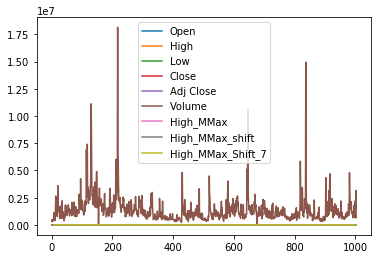

In [277]:
stock.plot()